## Data Exploration

**1. Find our experiment records**

In [5]:
!rm data2/.DS_Store
from os import listdir
from os.path import isfile, join
data_raw = [f for f in listdir("data2") if isfile(join("data2", f))]
print(len(data_raw), "files:", str(data_raw))

rm: data2/.DS_Store: No such file or directory
7 files: ['46.8.csv', '21.8.csv', '18.3.csv', '53.8.csv', '58.6.csv', '19.7.csv', '39.1.csv']


**2. Save into a dictionary**

In [6]:
import csv
import numpy as np
data = {}
for experiment in data_raw:
    t, temp = [], []
    with open("data2/"+experiment) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        for row in readCSV:
            t.append(int(row[0])/1e3)
            temp.append(float(row[1]))
        data[experiment[:-4]] = (np.array(t), np.array(temp))

**3. Plot**

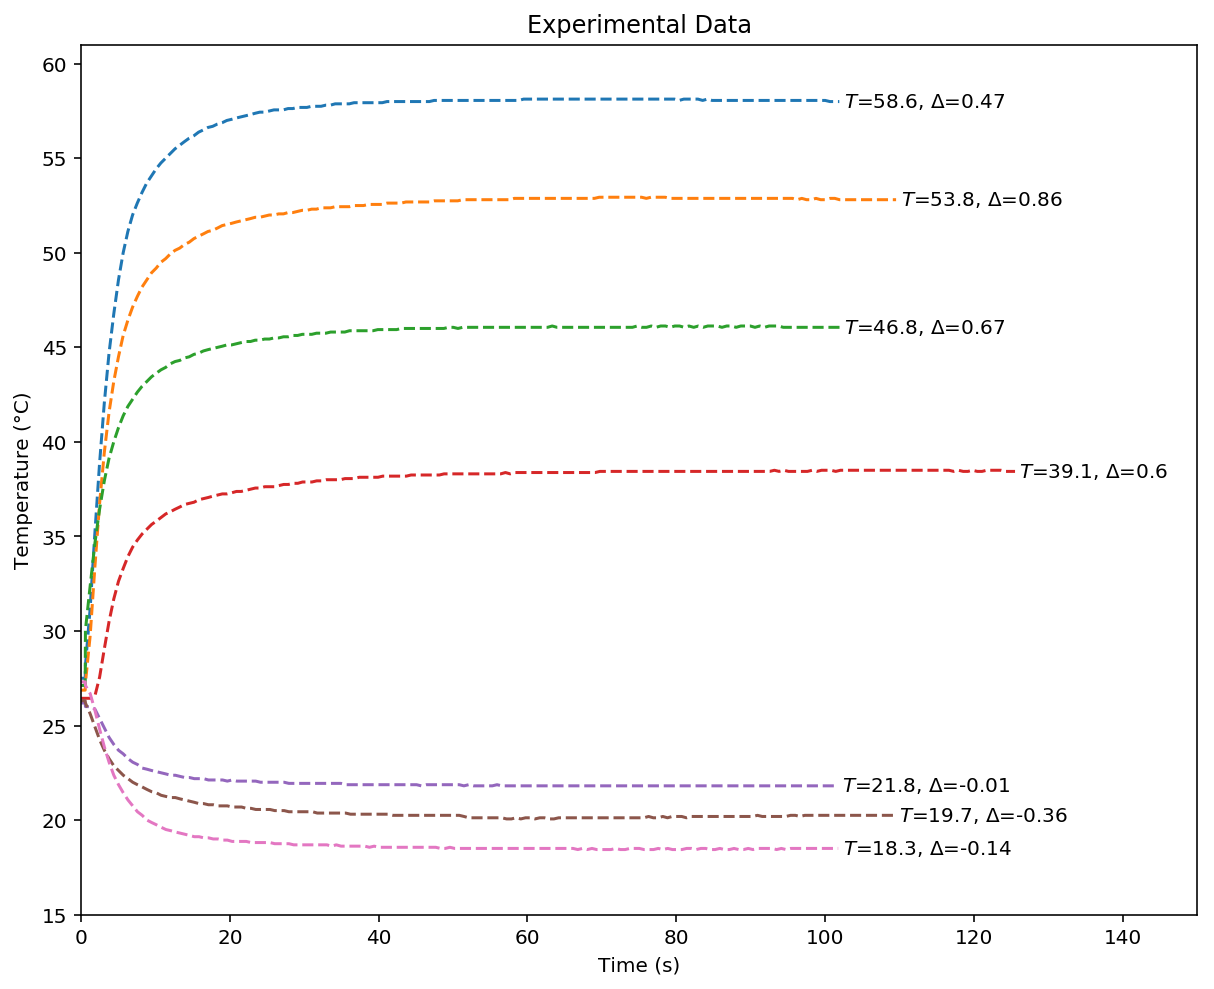

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.figure(1, figsize=(10, 8))
plt.title("Experimental Data")
plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C)")
plt.xticks(np.arange(0, 160, step=20))
plt.xlim(0,150)
plt.ylim(15,61)
plt.yticks(np.arange(15, 61, step=5))

ordered_experiments = list(data.keys())
ordered_experiments.sort()
for experiment in ordered_experiments[::-1]:
    t, temp = data[experiment]
    plt.plot(t, temp, '--', label=r"$T_i$="+experiment)
    if float(experiment) < 28:
        label = round(float(experiment) - temp.min(), 2)
    else:
        label = round(float(experiment) - temp.max(), 2)
    plt.text(t[-1]+0.6,temp[-1]-0.3, r"$T$="+experiment+r", $\Delta$="+str(label))
    #plt.axhline(y=float(experiment), linestyle='--')
#plt.legend()
plt.show()

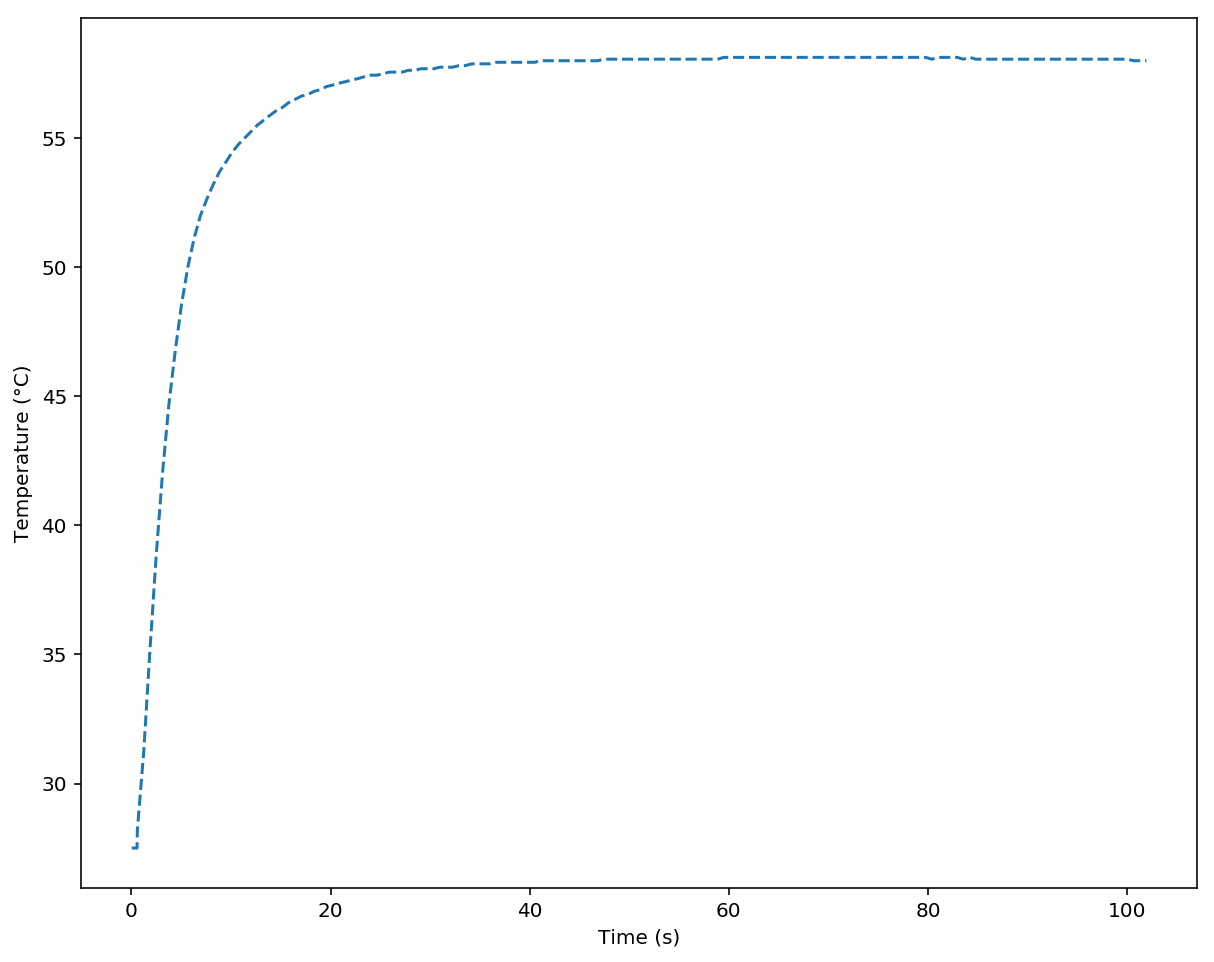

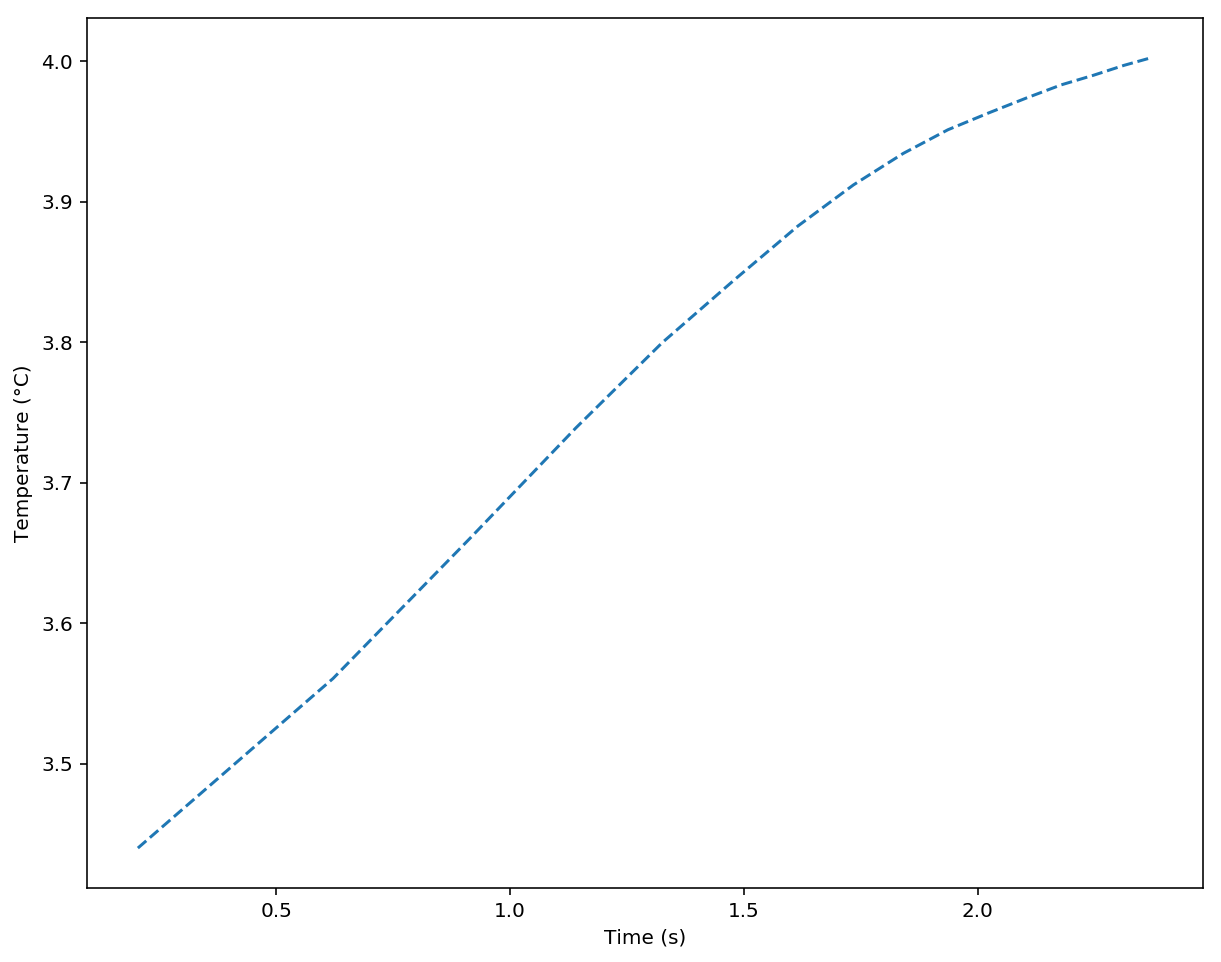

Equation: ln(temp) = [0.26266] ln(t) + [3.42459627]
Mean squared error: 0.001
Variance score: 0.974
Predicted final temp: 75.03500844016381


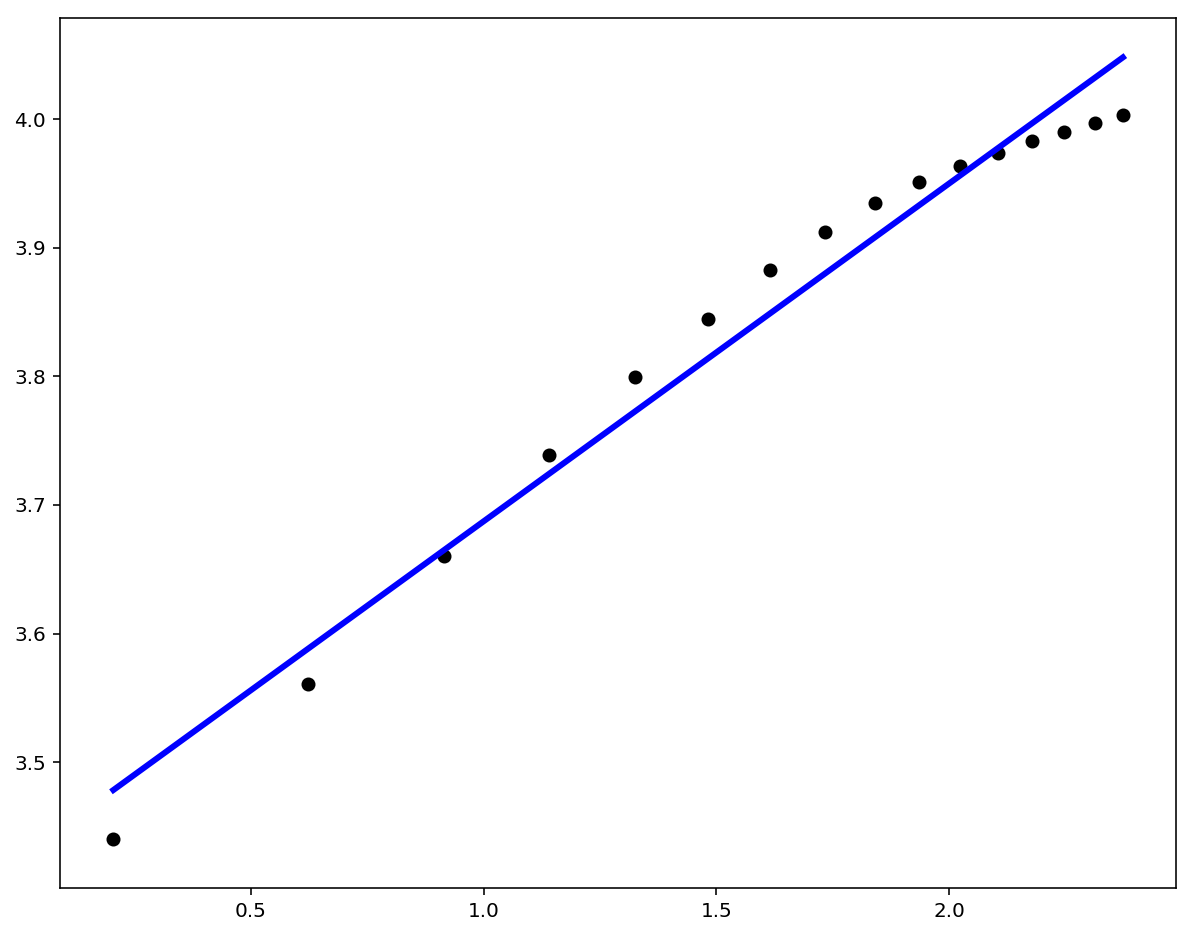

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

t, temp = data["58.6"]

plt.figure(2, figsize=(10, 8))
plt.plot(t, temp, '--', label=r"$T_i$="+experiment)
plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C)")
plt.show()

ln_t, ln_temp = [], []
for n, time in enumerate(t):
    ln_time = np.log(time)
    if (ln_time >= 0) and abs(np.log(temp[n])-np.log(temp[n-1]))>0.005:
        ln_t.append(ln_time)
        ln_temp.append(np.log(temp[n]))
        
#print(t, temp)       
#print(ln_t, ln_temp)

plt.figure(3, figsize=(10, 8))
plt.plot(ln_t, ln_temp, '--')
plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C)")
plt.show()

ln_t = np.array(ln_t).reshape(-1, 1)
ln_temp = np.array(ln_temp).reshape(-1, 1)

regr = LinearRegression()
regr.fit(ln_t, ln_temp)
ln_temp_pred = regr.predict(ln_t)

print("Equation: ln(temp) =", regr.coef_[0], "ln(t) +", regr.predict([[0]])[0])
print("Mean squared error: %.3f" % mean_squared_error(ln_temp, ln_temp_pred))
print('Variance score: %.3f' % r2_score(ln_temp, ln_temp_pred)) # 1 is perfect prediction

prediction = regr.predict([[np.log(30)]])[0][0]
print("Predicted final temp:", np.exp(prediction))

plt.figure(4, figsize=(10, 8))
plt.scatter(ln_t, ln_temp, color='black')
plt.plot(ln_t, ln_temp_pred, color='blue', linewidth=3)
plt.show()

In [28]:
for TIME_PRED in range(30, 100, 2):
    failed = []
    for experiment in data.keys():
        t, temp = data[experiment]

        ln_t, ln_temp = [], []
        t_lim = 49
        for n, time in enumerate(t[:t_lim]):
            ln_time = time
            if (ln_time >= 0):
                ln_t.append(ln_time)
                ln_temp.append(np.log(temp[n]))

        ln_t = np.array(ln_t).reshape(-1, 1)
        ln_temp = np.array(ln_temp).reshape(-1, 1)

        regr = LinearRegression()
        regr.fit(ln_t, ln_temp)
        ln_temp_pred = regr.predict(ln_t)

        prediction = regr.predict([[np.log(TIME_PRED)]])[0][0]
        prediction = round(np.exp(prediction), 2)
        error = round(abs(float(experiment) - prediction),2)
        PASS = (error<1.5)

        if PASS == False:
            failed.append(experiment)
        failed.sort()

        """print("\n===========================================\n  Correct Temperature:", experiment)
        print("Predicted Temperature:", prediction, end=" ")
        print("(used data up to t =", t[t_lim-1], "s)")
        print("      Numerical error:", error)
        print("\nEquation: ln(temp) =", regr.coef_[0], "ln(t) +", regr.predict([[0]])[0])
        print("    PASS:", PASS)"""
        #print("Mean squared error: %.3f" % mean_squared_error(ln_temp, ln_temp_pred), end=", ")
        #print('Variance score: %.3f' % r2_score(ln_temp, ln_temp_pred), "\n") # 1 is perfect prediction
    print("\nFailed:", failed, "using prediction time", TIME_PRED)


Failed: ['18.3', '19.7', '21.8', '39.1', '46.8', '53.8', '58.6'] using prediction time 30

Failed: ['18.3', '19.7', '21.8', '39.1', '46.8', '53.8', '58.6'] using prediction time 32

Failed: ['18.3', '19.7', '21.8', '39.1', '46.8', '53.8', '58.6'] using prediction time 34

Failed: ['18.3', '19.7', '21.8', '39.1', '46.8', '53.8', '58.6'] using prediction time 36

Failed: ['18.3', '19.7', '21.8', '39.1', '46.8', '53.8', '58.6'] using prediction time 38

Failed: ['18.3', '19.7', '21.8', '39.1', '46.8', '53.8', '58.6'] using prediction time 40

Failed: ['18.3', '19.7', '21.8', '39.1', '46.8', '53.8', '58.6'] using prediction time 42

Failed: ['18.3', '19.7', '21.8', '39.1', '46.8', '53.8', '58.6'] using prediction time 44

Failed: ['18.3', '19.7', '21.8', '39.1', '46.8', '53.8', '58.6'] using prediction time 46

Failed: ['18.3', '19.7', '21.8', '39.1', '46.8', '53.8', '58.6'] using prediction time 48

Failed: ['18.3', '19.7', '21.8', '39.1', '46.8', '53.8', '58.6'] using prediction time 50